# Independent vs Dependent Variables
***

Let's say we want to do a little experiment. 
- After learning in a book about the different variables that affect the growth of animals, we decide to test it ourselves. 
- We are able to get some funding from anonymous investors. The fish we will experiment upon will be goldfish.

![A goldfish](resources/goldfish.jpg)

## Tools:
- Large Fish Bowls
- 7.5 pH Freshwater
- Peas
- A place with multiple rooms

## Sunlight Values:
- 20%
- 50%
- 80%
- 100%

Speed of growth will be the result we recieve from this experiment. 📈

We have some constant variables which do not affect the data we obtain.

In [2]:
# Constants
WATER_TYPE = 'fresh'
BOWL_SIZE = 'large'
WATER_ACIDITY = 7.5
FOOD_TYPE = 'peas'
FOOD_AMOUNT = 1

Then the independent variable which changes frequently, and directly affects the data.

In [3]:
# Independent Variable
# The value of this variable will change
sunlight_amount = [20, 50, 80, 100]
sunlight_amount

[20, 50, 80, 100]

And finally the dependent variable, or the data we get.

In [17]:
# Dependent Variable
growth_speed = {
    "first fish": 50,
    "second fish": 120,
    "third fish": 130,
    "fourth fish": 110
    }
index = 0
for fish in growth_speed.keys():
    print(f'The {fish} had a sunlight amount of {sunlight_amount[index]}% and has a growth rate of {growth_speed[fish]}.')
    index += 1

The first fish had a sunlight amount of 20% and has a growth rate of 50.
The second fish had a sunlight amount of 50% and has a growth rate of 120.
The third fish had a sunlight amount of 80% and has a growth rate of 130.
The fourth fish had a sunlight amount of 100% and has a growth rate of 110.


### Resources:
https://www.youtube.com/watch?v=_VdOB4JJE_8

# Linear Regression
***

In [5]:
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [7]:
# We get some random values for the model

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

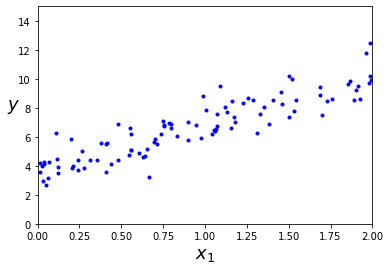

In [8]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
lin_reg.intercept_, lin_reg.coef_

(array([3.66068793]), array([[3.2228584]]))

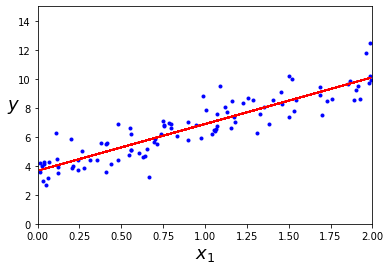

In [10]:
plt.plot(X, y, "b.")
plt.plot(X, y_predict, '-r')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Linear Regression Metrics
***

### Preparing the Model

In [11]:
data = pd.read_csv('data/wine.csv')

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, train_size=0.8)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

- ### R2 Score

$$
R^2 = \frac{\sum_{t=1}^{n}(\hat{y_t}-\overline{y})^2}{\sum_{t=1}^{n}(y_t-\overline{y})^2}
$$

- $y_t$ - actual value of the dependent variable (measured)
- $\hat{y_t}$ - predicted value of the dependent variable (based on a regression model)
- $\overline{y}$ - predicted value of the dependent variable (based on a regression model)

In [12]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.2400580988877744

- ### MAE (Mean Absolute Error)

$$
MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y_i}|
$$

- $y_i$ - the actual value
- $\hat{y_i}$ - value predicted by the model

In [13]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.5461049593684699

- ### MAPE (Mean Absolute Percentage Error)

$$
MAPE = \frac{1}{n}\sum_{i=1}^{n}|\frac{y_i - \hat{y_i}}{y_i}|
$$

- $y_i$ - the actual value
- $\hat{y_i}$ - value predicted by the model

In [14]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.10348137524989695

- ### WMAPE (Weighted Mean Absolute Percentage Error)

$$
WMAPE = \frac{\sum_{i=1}^{n}|y_i - \hat{y_i}|*100}{\sum_{i=1}^{n}y_i}
$$

- $y_i$ - the actual value
- $\hat{y_i}$ - value predicted by the model

*This metric is currently not implemented in the sklearn library.*

- ### MSE (Mean Squared Error)

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$

- $y_i$ - the actual value
- $\hat{y_i}$ - value predicted by the model

In [15]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.5261410255981674

- ### RMSE (Root Mean Squared Error)

$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
$$

- $y_i$ - the actual value
- $\hat{y_i}$ - value predicted by the model

In [16]:
# Imported in the previous cell
mean_squared_error(y_test, y_pred, squared=False)

0.7253557924206351

# Bias & Variance
***

### Bias

The inability for a machine learning method to capture the true relationship is called **Bias**.

![Bias](resources/bias.jpg)

A method like linear regression creates the relationship in the form of a straight line through the data.

![StraightLine](resources/underfitting.jpg)

While another method can make a relationship in the form of a squiggly line. But this creates a problem.

![Overfitting](resources/overfitting.jpg)

In machine learning, we usually split the data into training data for the model and testing data.

The relationship that fits the training data with no Bias, will definetely not fit the testing data.

This brings us to the next concept.

### Variance

**Variance** is the amount by which the predictions would change if we fit the model to a different training data set.

![Variance](resources/variance.jpg)

### Bias vs Variance

**Bias** and **Variance** are direct opposites. To create the best relationship for our data, we need to find a sweet spot between them.

![BiasVsVariance](resources/bias_vs_variance1.jpg)

Since this is the case, we have to accept the fact that we will have a small amount of prediction error, but that error will be consistent.

### Resources:
https://www.youtube.com/watch?v=EuBBz3bI-aA